In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_India = df[(df['job_country']=='India')&(df['job_title_short'] == 'Data Scientist')]


In [3]:
df_Google_Ind = df_India[df_India['company_name'] == 'Google']
df_Google_Ind = df_India.dropna(subset=['salary_year_avg'])

df_Google_Ind = df_Google_Ind.explode('job_location')

df_Google_Ind[['salary_year_avg', 'job_location']].head(10)



,salary_year_avg,job_location
3930,114516.0,"Bengaluru, Karnataka, India"
9143,79200.0,"Bengaluru, Karnataka, India"
16358,157500.0,India
27440,157500.0,"Pune, Maharashtra, India"
30999,157500.0,"Noida, Uttar Pradesh, India"
51053,79200.0,"Bengaluru, Karnataka, India"
52030,157500.0,"Bengaluru, Karnataka, India"
88378,90670.0,"Hyderabad, Telangana, India"
90987,90000.0,India
92980,88128.0,"Gurugram, Haryana, India"


In [4]:
df_DS_top_pay = df_Google_Ind.groupby('job_location')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DS_top_pay = df_DS_top_pay.head(10)

df_DS_top_pay = df_DS_top_pay.drop('India')
df_DS_top_pay

,count,median
job_location,,
"Jaipur, Rajasthan, India",1,157500.0
"Bengaluru, Karnataka, India",39,114516.0
"Mumbai, Maharashtra, India",1,93600.0
"Hyderabad, Telangana, India",12,92135.0
"Noida, Uttar Pradesh, India",3,87705.0
"Ahmedabad, Gujarat, India",1,87307.5
"Gurugram, Haryana, India",4,83664.0
"Chennai, Tamil Nadu, India",6,83452.5
"Pune, Maharashtra, India",6,79200.0


In [5]:
df_DS_Skills = df_Google_Ind.groupby('company_name')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DS_Skills = df_DS_Skills.head(10).sort_values(by='median', ascending=False)

df_DS_Skills

,count,median
company_name,,
HRS,2,166500.0
Visa,7,157500.0
GoTo Group,2,157500.0
Gartner,2,126250.0
Freshworks,2,118350.0
Capco,4,118350.0
Tesco Bengaluru,5,113500.0
Syngenta Group,3,93600.0
Bosch Group,4,86400.0


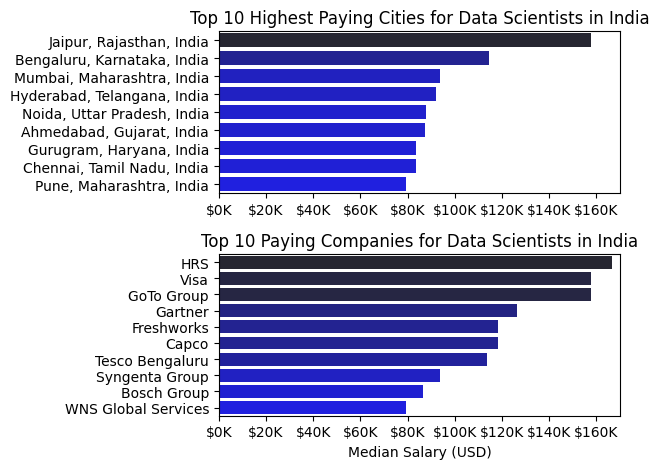

In [8]:
fig, ax = plt.subplots(2, 1)  

sns.barplot(data=df_DS_top_pay, x='median', y=df_DS_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()

ax[0].set_title('Top 10 Highest Paying Cities for Data Scientists in India')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].set_xlim(0,170000)
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))



sns.barplot(data=df_DS_Skills, x='median', y=df_DS_Skills.index, hue='median', ax=ax[1], palette='dark:b_r')
ax[1].legend().remove()

ax[1].set_title('Top 10 Paying Companies for Data Scientists in India')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()

In [7]:
df_Google_Ind

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
3930,Data Scientist,Lead Data Scientist,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-12-12 13:27:33,False,False,India,year,114516.0,NaN,Boeing,"[python, r, c++, tensorflow, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
9143,Data Scientist,Manager - Data Science,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-05-12 13:28:49,False,False,India,year,79200.0,NaN,BitGo,"[sql, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."
16358,Data Scientist,Data Scientist,India,via Ai-Jobs.net,Full-time,False,India,2023-07-19 13:12:35,False,False,India,year,157500.0,NaN,Silent Eight,"[python, sql, bash, postgresql, pandas, pyspar...","{'async': ['jira', 'confluence'], 'databases':..."
27440,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-06-15 13:27:09,False,False,India,year,157500.0,NaN,"AppZen, Inc.","[python, r]","{'programming': ['python', 'r']}"
30999,Data Scientist,Data Scientist,"Noida, Uttar Pradesh, India",via Ai-Jobs.net,Full-time,False,India,2023-07-07 13:14:07,False,False,India,year,157500.0,NaN,HashiCorp,"[python, aws, numpy, pandas, tensorflow, pytor...","{'cloud': ['aws'], 'libraries': ['numpy', 'pan..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762560,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-06-12 20:29:35,False,False,India,year,70000.0,NaN,Avaloq,"[python, r, sql, java, mysql, sql server, reds...","{'analyst_tools': ['tableau', 'power bi'], 'cl..."
762634,Data Scientist,Data Modeller,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-02-23 20:30:17,True,False,India,year,64800.0,NaN,Capco,"[sql, python, scala, hadoop]","{'libraries': ['hadoop'], 'programming': ['sql..."
768729,Data Scientist,Lead Data Modeler/Developer for Business Analy...,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-02-04 01:33:21,False,False,India,year,79200.0,NaN,Bosch Group,[sql],{'programming': ['sql']}
770989,Data Scientist,"Data Scientist –ML, DL, Python","Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-07-21 01:12:02,False,False,India,year,157500.0,NaN,Capco,"[python, r, sql, t-sql, sql server, snowflake,...","{'analyst_tools': ['tableau', 'power bi', 'qli..."
